# Introduction
\[_In case you’re unable to see the atoti visualizations in GitHub, try viewing the notebook in [nbviewer](https://nbviewer.org/github/atoti/notebooks/blob/main/notebooks/01-use-cases/other-industries/airline-industry/main.ipynb)._]

## OLAP operations with atoti for use case from Airline Industry
From the vast domain of the aviation sector, we present a use case pertaining to performance of the airline industry during the covid-19 pandemic. The notebook illustrates the smooth blending of olap operations with atoti to simulate/model multiple *“what if”* scenarios easily, to gain crucial insights.

## Dataset used:
The simulated dataset has the three dimensions as :-
* airlines - Contains some important information pertaining to different  airlines, types of aircrafts, categories of booking class, seats availability w.r.t booking class, daily departures  among others.
* routes - The routes operated by each airline and distance between the source and destination in kilometers for each airline etc.
* date - The occurrence of real world events such as booking a ticket can be measured at different levels of hierarchy such as year, month, date, etc.

In addition to that we have the fact table(which has the measures) 
* salesdata -  Here all details containing the tickets sold by a particular airline along specific routes are filled which can be used to get insights about some business performance metrics such as revenue generated by a specific airline, revenue generated along specific routes, revenue generated with respect to a particular booking category, etc.

* The use case considers seven airlines and 24 routes for each of the seven airlines.

## Importing Libraries

In [1]:
# Import python libraries
import datetime

import pandas as pd

# Import atoti library
import atoti as tt

# Part I - Loading, joining the data and creating cubes

## Load sales data

In [2]:
# creating a session
session = tt.Session(user_content_storage="./content")

In [3]:
session.link()

Open the notebook in JupyterLab with the atoti extension enabled to see this link.

In [4]:
# loading salesdata
salesdata = pd.read_csv("data/salesdata.csv")
salesdata_table = session.read_pandas(
    salesdata,
    keys=["SalesId", "Date", "RouteId"],
    table_name="salesdata_table",
    types={
        "SalesId": tt.type.STRING,
        "Date": tt.type.STRING,
        "RouteId": tt.type.STRING,
    },
)
salesdata_table.head(8)

AirlineId  BookingsBusinessClass  \
SalesId  Date       RouteId                                    
sales001 05-01-2020 r001           AA                      8   
sales007 11-01-2020 r003           UA                     15   
                    r011           G4                      1   
sales009 13-01-2020 r007           UA                     26   
sales010 14-01-2020 r006           WN                      1   
sales011 15-01-2020 r005           UA                     13   
sales017 21-01-2020 r013           WN                      1   
sales019 23-01-2020 r003           WN                      1   

                             UnitPriceBusinessClass(dollars)  \
SalesId  Date       RouteId                                    
sales001 05-01-2020 r001                              932.00   
sales007 11-01-2020 r003                              162.80   
                    r011                              176.40   
sales009 13-01-2020 r007                               58.80   
sales010 14-01-2020 r006                             1534.00   
sales011 15-01-2020 r005                             1534.00   
sales017 21-01-2020 r013                              108.08   
sales019 23-01-2020 r003                              590.16   

                             BookingsPremiumEconomyClass  \
SalesId  Date       RouteId                                
sales001 05-01-2020 r001                              20   
sales007 11-01-2020 r003                               6   
                    r011                              30   
sales009 13-01-2020 r007                               2   
sales010 14-01-2020 r006                               9   
sales011 15-01-2020 r005                              15   
sales017 21-01-2020 r013                              37   
sales019 23-01-2020 r003                              15   

                             UnitPricePremiumEconomyClass(dollars)  \
SalesId  Date       RouteId                                          
sales001 05-01-2020 r001                                    925.00   
sales007 11-01-2020 r003                                    155.80   
                    r011                                    169.40   
sales009 13-01-2020 r007                                     51.80   
sales010 14-01-2020 r006                                   1527.00   
sales011 15-01-2020 r005                                   1527.00   
sales017 21-01-2020 r013                                    101.08   
sales019 23-01-2020 r003                                    583.16   

                             BookingsEconomyClass  \
SalesId  Date       RouteId                         
sales001 05-01-2020 r001                      128   
sales007 11-01-2020 r003                       34   
                    r011                       10   
sales009 13-01-2020 r007                       18   
sales010 14-01-2020 r006                       14   
sales011 15-01-2020 r005                       21   
sales017 21-01-2020 r013                       32   
sales019 23-01-2020 r003                       10   

                             UnitPriceEconomyClass(dollars)      Total  
SalesId  Date       RouteId                                             
sales001 05-01-2020 r001                             923.00  144100.00  
sales007 11-01-2020 r003                             153.80    8606.00  
                    r011                             167.40    6932.40  
sales009 13-01-2020 r007                              49.80    2528.80  
sales010 14-01-2020 r006                            1525.00   36627.00  
sales011 15-01-2020 r005                            1525.00   74872.00  
sales017 21-01-2020 r013                              99.08    7018.60  
sales019 23-01-2020 r003                             581.16   15149.16

In [5]:
# loading airlines dataset to skip the index column and then store it in atoti store

airline_df = pd.read_csv("data/airlines.csv", index_col=0)
airlines_table = session.read_pandas(
    airline_df, keys=["AirlineId"], table_name="airlines_table"
)
airline_df.head()

,AirlineName,SeatsBusinessClass,SeatsPremiumEconomyClass,SeatsEconomyClass,TotalSeats,DailyDepartures,ModelNumber,AircraftName,Weight,Speed,Length(m),Height(m)
AirlineId,,,,,,,,,,,,
AA,American (American Airlines),8,24,96,128,12,A319-100,Airbus,"39,000 lb",871 km/h,33.84,11.76
UA,United (United Airlines),36,70,113,219,20,A320-200,Airbus,"44,000 lb",871 km/h,37.57,11.76
DL,Delta (Delta Air Lines),16,36,108,160,10,757-200,Boeing,"57,160 lb",918 km/hr,47.3,13.6
US,U S Air (US Airways),20,21,206,247,15,A320-200,Airbus,"44,000 lb",871 km/h,37.57,11.76
AS,Inc. (Alaska Airlines),16,20,141,177,12,A320-200,Airbus,"44,000 lb",871 km/h,37.57,11.76


In [6]:
# loading routes dataset

routes_table = session.read_csv("data/routes.csv", keys=["RouteId"])
routes_table.head()

,Departure,Destination,Distance(km)
RouteId,,,
r011,Los Angeles,Eureka,1040
r023,New york,Paris,5840
r012,Los Angeles,Boston,4202
r024,New york,Seattle,3880
r001,Houston,Acapulco,1537


In [7]:
# loading dates dataset
df = pd.read_csv("data/date.csv")
df = df.astype(str)
dates_table = session.read_pandas(df, keys=["Date"], table_name="dates_table")
dates_table.head()

,Year,Quarter,Month
Date,,,
28-04-2020,2020,2,4
13-05-2020,2020,2,5
26-05-2020,2020,2,5
19-07-2020,2020,3,7
08-02-2021,2021,1,2


## Join the data tables

In [8]:
# Now we join the newly created stores to the sales store

salesdata_table.join(airlines_table, mapping={"AirlineId": "AirlineId"})

salesdata_table.join(routes_table, mapping={"RouteId": "RouteId"})

salesdata_table.join(dates_table, mapping={"Date": "Date"})

## Creating the cube

In [9]:
cube = session.create_cube(salesdata_table)

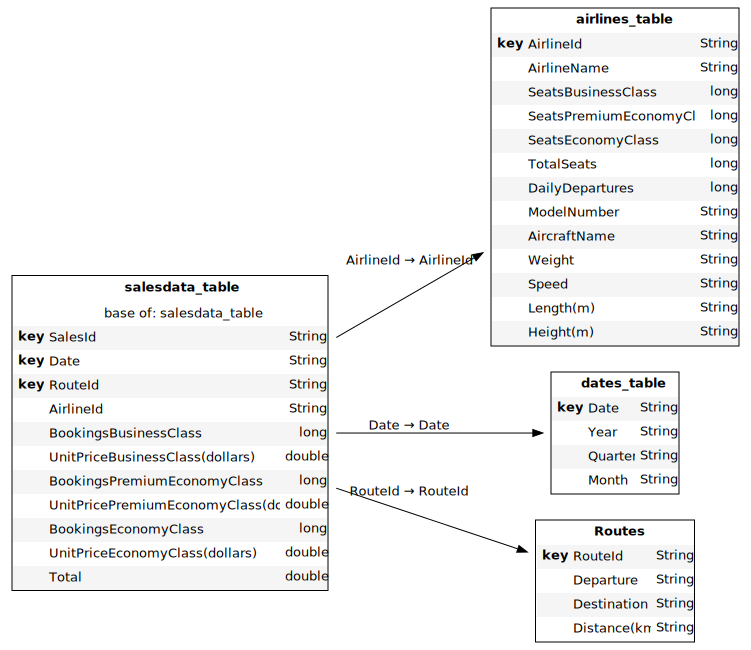

In [10]:
session.tables.schema

In [11]:
# defining measures, level and hierarchy
m = cube.measures
l = cube.levels
h = cube.hierarchies

## Defining New Custom Measure

As we saw in the salesdata table we have multiple active airlines for a day, but we may need daily aggregate revenue.So we will define a new measure

In [12]:
m["Total Daily Revenue"] = tt.agg.sum(
    tt.agg.single_value(salesdata_table["Total"]),
    scope=tt.OriginScope(l["SalesId"], l["Date"], l["RouteId"]),
)

# PART II: Visualizations

We Present the following insights by implementing olap operations (slice, dice and drill down) with atoti.

## Computing yearly and quarterly Revenue

The first insight visualised through pie-chart clearly shows that covid-19 had a negative impact on the airline industry as we see fall in revenue for year 2021 as compared to 2020. 

In [13]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Furthermore if we see the performance of year 2020 across all four quarters we see that quarter three was the one which was negatively impacted as compared to other quarters.

In [14]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

## Computing quarterly revenue for four different airlines

This insight presents a comparative analysis of four different airlines that were active for the year 2020 and the revenue generated by each airline in these four quarters. We see that Allegiant Airlines business was negatively impacted in quarter 4. This can be used to simulate drill down operation as year → quarter with aggregating across routes.

In [15]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

## Computing quarterly revenue for four different airlines and drilling down across routes

Here we again have a comparative analysis of the above four airlines but now the revenue generated is shown along each specific route that the airlines were active in for all quarters.


In [16]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

## Computing quarterly revenue for a single airlines across routes by slicing

We further slice the cube for “American Airlines” to show the total revenue across the four quarters along 12 distinct routes.

In [17]:
session.visualize("American Airlines")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

## Computing revenue for a month by booking classes

This insight shows the revenue generated by a particular booking class. We consider three categories such as business class, premium economy and economy.
This is a dice operation as we dice it for year (2020), month (May) and Route(route1) for a specific airline(American Airline).

In [18]:
salesdata.head()

,SalesId,Date,RouteId,AirlineId,BookingsBusinessClass,UnitPriceBusinessClass(dollars),BookingsPremiumEconomyClass,UnitPricePremiumEconomyClass(dollars),BookingsEconomyClass,UnitPriceEconomyClass(dollars),Total
0,sales001,05-01-2020,r001,AA,8,932.00,20,925.00,128,923.00,144100.00
1,sales001,05-01-2020,r018,WN,1,469.52,48,462.52,43,460.52,42472.84
2,sales001,05-01-2020,r008,G4,1,124.08,6,117.08,37,115.08,5084.52
3,sales001,05-01-2020,r021,WN,1,900.72,11,893.72,45,891.72,50859.04
4,sales002,06-01-2020,r024,G4,1,932.00,22,925.00,14,923.00,34204.00


In [19]:
airlines_table.head()

,AirlineName,SeatsBusinessClass,SeatsPremiumEconomyClass,SeatsEconomyClass,TotalSeats,DailyDepartures,ModelNumber,AircraftName,Weight,Speed,Length(m),Height(m)
AirlineId,,,,,,,,,,,,
G4,Allegiant (Allegiant Air),8,30,117,155,3,A320-200,Airbus,"44,000 lb",871 km/h,37.57,11.76
DL,Delta (Delta Air Lines),16,36,108,160,10,757-200,Boeing,"57,160 lb",918 km/hr,47.3,13.6
WN,Southwest (Southwest Airlines),8,40,143,191,30,737-600,Boeing,121500 lb,871 km/h,31.24,12.57
AS,Inc. (Alaska Airlines),16,20,141,177,12,A320-200,Airbus,"44,000 lb",871 km/h,37.57,11.76
US,U S Air (US Airways),20,21,206,247,15,A320-200,Airbus,"44,000 lb",871 km/h,37.57,11.76


In [20]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

## Visualizing the info in a dashboard 

The various scenarious and simulations can be simultaneously compared using a dashbard in atoti. 
These dashoboards are highly customisable and can be designed using the various widgets as per the business objective.
These can be saved and shared silpky by sharing a URL.
Click on the link below to explore a sample dashboard we created!!

In [21]:
session.link(path="#/dashboard/088")

Open the notebook in JupyterLab with the atoti extension enabled to see this link.

## Conclusion:

Such insights from the aviation industry can help the airlines for sales and marketing, exciting offers to attract customers post COVID-19 restrictions in travel, and generate any additional insights that could benefit their business as well their customer services. 

For more interesting notebooks, check out the [atoti gallary](https://github.com/atoti/notebooks)

# _ _The end_ _